In [0]:
import pandas as pd
import seaborn as sns

In [0]:
test=pd.read_csv("/content/test_8i3B3FC.csv")

In [8]:
test.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
dtype: int64

In [0]:
train=pd.read_csv("/content/train_NIR5Yl1.csv.crdownload")

In [6]:
train["Answers"].value_counts()

2.0     69018
1.0     62846
3.0     54372
4.0     39053
5.0     26855
        ...  
57.0        2
66.0        1
59.0        1
76.0        1
53.0        1
Name: Answers, Length: 62, dtype: int64

In [40]:
train.isnull().sum()

ID            0
Tag           1
Reputation    1
Answers       1
Username      1
Views         1
Upvotes       1
dtype: int64

In [0]:
train.drop([318247],inplace=True)

In [42]:
train

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623.0,7855.0,42.0
1,327662,a,26046.0,12.0,21781.0,55801.0,1175.0
2,468453,c,1358.0,4.0,56177.0,8067.0,60.0
3,96996,a,264.0,3.0,168793.0,27064.0,9.0
4,131465,c,4271.0,4.0,112223.0,13986.0,83.0
...,...,...,...,...,...,...,...
318242,285514,j,18666.0,9.0,118456.0,18647.0,232.0
318243,52438,p,2836.0,6.0,110987.0,73758.0,143.0
318244,291898,i,792.0,1.0,136611.0,2609.0,8.0
318245,355766,j,21.0,1.0,94185.0,159.0,8.0


In [0]:
train.drop(["ID","Username",],axis=1,inplace=True)

In [0]:
from sklearn import preprocessing

In [0]:
le = preprocessing.LabelEncoder()

In [0]:
train["Tag"]=le.fit_transform(train["Tag"])

In [47]:
train.dtypes

Tag             int64
Reputation    float64
Answers       float64
Views         float64
Upvotes       float64
dtype: object

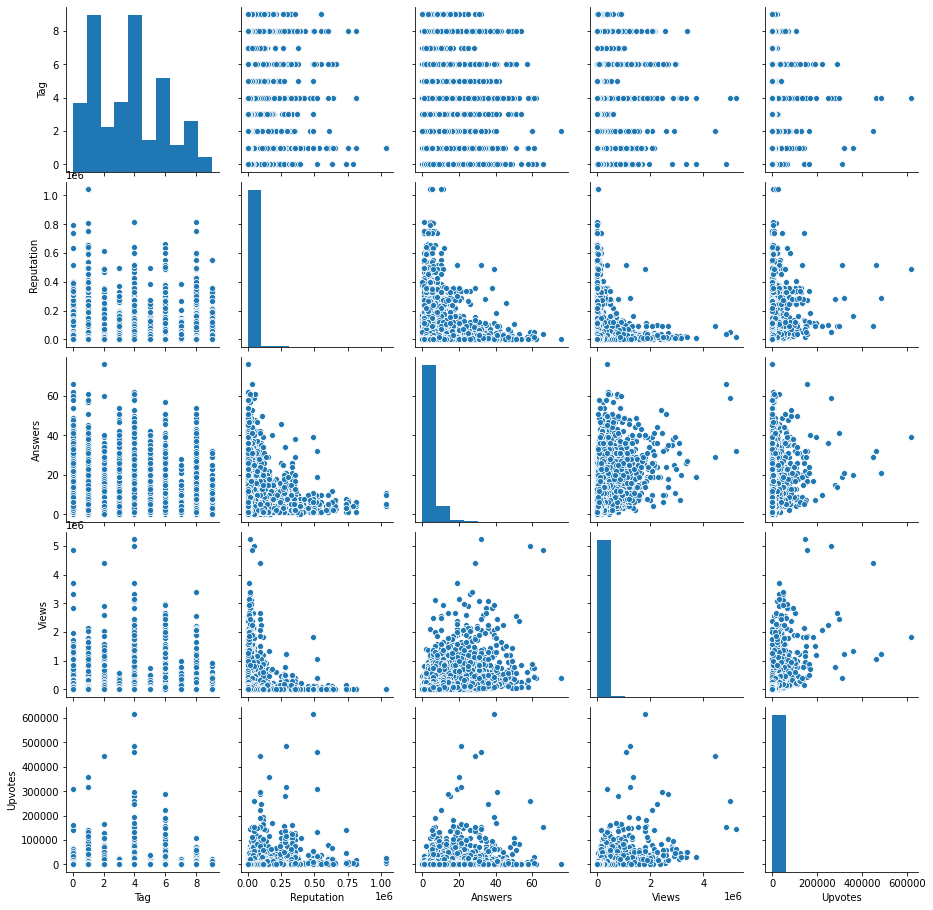

In [17]:
sns.pairplot(train)

In [0]:
train.drop("Upvotes",axis=1,inplace=True)

In [0]:
y=train["Upvotes"]

In [20]:
train

,Tag,Reputation,Answers,Views
0,0,3942.0,2.0,7855.0
1,0,26046.0,12.0,55801.0
2,1,1358.0,4.0,8067.0
3,0,264.0,3.0,27064.0
4,1,4271.0,4.0,13986.0
...,...,...,...,...
318242,4,18666.0,9.0,18647.0
318243,6,2836.0,6.0,73758.0
318244,3,792.0,1.0,2609.0
318245,4,21.0,1.0,159.0


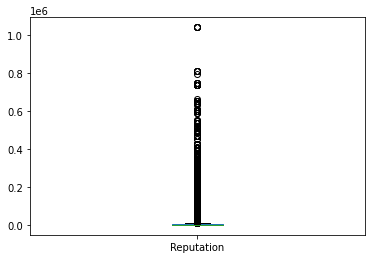

In [21]:
train["Reputation"].plot.box()

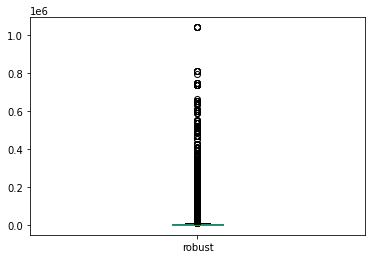

In [30]:
train["robust"].plot.box()

In [0]:
import numpy as np

In [0]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler(quantile_range = (0.1,0.9))


In [0]:
robust=robust.fit_transform(train.Reputation.values.reshape(-1,1))

In [53]:
train

,Tag,Reputation,Answers,Views
0,0,3942.0,2.0,7855.0
1,0,26046.0,12.0,55801.0
2,1,1358.0,4.0,8067.0
3,0,264.0,3.0,27064.0
4,1,4271.0,4.0,13986.0
...,...,...,...,...
318242,4,18666.0,9.0,18647.0
318243,6,2836.0,6.0,73758.0
318244,3,792.0,1.0,2609.0
318245,4,21.0,1.0,159.0


In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [0]:
poly_reg = PolynomialFeatures(degree = 2,interaction_only=False, include_bias=True)

In [0]:
X_poly = poly_reg.fit_transform(train)

In [57]:
type(X_poly)

numpy.ndarray

In [58]:
X_poly.shape

(318247, 15)

In [59]:
train.columns

Index(['Tag', 'Reputation', 'Answers', 'Views'], dtype='object')

In [0]:
col=["1","Tag", "Reputation", "Answers", "Views","T2","TR","TA","TV","R2","RA","RV","A2","AV","V2"]

In [0]:
xx=pd.DataFrame(X_poly,columns=col)

In [66]:
xx

,1,Tag,Reputation,Answers,Views,T2,TR,TA,TV,R2,RA,RV,A2,AV,V2
0,1.0,0.0,3942.0,2.0,7855.0,0.0,0.0,0.0,0.0,15539364.0,7884.0,3.096441e+07,4.0,15710.0,6.170102e+07
1,1.0,0.0,26046.0,12.0,55801.0,0.0,0.0,0.0,0.0,678394116.0,312552.0,1.453393e+09,144.0,669612.0,3.113752e+09
2,1.0,1.0,1358.0,4.0,8067.0,1.0,1358.0,4.0,8067.0,1844164.0,5432.0,1.095499e+07,16.0,32268.0,6.507649e+07
3,1.0,0.0,264.0,3.0,27064.0,0.0,0.0,0.0,0.0,69696.0,792.0,7.144896e+06,9.0,81192.0,7.324601e+08
4,1.0,1.0,4271.0,4.0,13986.0,1.0,4271.0,4.0,13986.0,18241441.0,17084.0,5.973421e+07,16.0,55944.0,1.956082e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318242,1.0,4.0,18666.0,9.0,18647.0,16.0,74664.0,36.0,74588.0,348419556.0,167994.0,3.480649e+08,81.0,167823.0,3.477106e+08
318243,1.0,6.0,2836.0,6.0,73758.0,36.0,17016.0,36.0,442548.0,8042896.0,17016.0,2.091777e+08,36.0,442548.0,5.440243e+09
318244,1.0,3.0,792.0,1.0,2609.0,9.0,2376.0,3.0,7827.0,627264.0,792.0,2.066328e+06,1.0,2609.0,6.806881e+06
318245,1.0,4.0,21.0,1.0,159.0,16.0,84.0,4.0,636.0,441.0,21.0,3.339000e+03,1.0,159.0,2.528100e+04


In [0]:
bn = Binarizer(threshold=7)

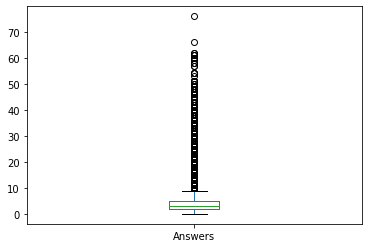

In [69]:
xx["Answers"].plot.box()

#BOX PLOT ANALYSIS

In [0]:
upper_quartile=np.percentile(xx["Answers"], 75)

In [0]:
lower_quartile = np.percentile(xx["Answers"], 25)

In [0]:
iqr = upper_quartile - lower_quartile
upper_whisker = xx["Answers"][xx["Answers"]<=upper_quartile+1.5*iqr].max()
lower_whisker =xx["Answers"][xx["Answers"]>=lower_quartile-1.5*iqr].min()

In [80]:
upper_whisker

9.0

In [0]:
from sklearn.preprocessing import Binarizer

In [0]:
bn = Binarizer(threshold=9)

In [100]:
xx

,1,Tag,Reputation,Answers,Views,T2,TR,TA,TV,R2,RA,RV,A2,AV,V2,bn_trans,robust
0,1.0,0.0,3942.0,2.0,7855.0,0.0,0.0,0.0,0.0,15539364.0,7884.0,3.096441e+07,4.0,15710.0,6.170102e+07,0.0,2706.0
1,1.0,0.0,26046.0,12.0,55801.0,0.0,0.0,0.0,0.0,678394116.0,312552.0,1.453393e+09,144.0,669612.0,3.113752e+09,1.0,24810.0
2,1.0,1.0,1358.0,4.0,8067.0,1.0,1358.0,4.0,8067.0,1844164.0,5432.0,1.095499e+07,16.0,32268.0,6.507649e+07,0.0,122.0
3,1.0,0.0,264.0,3.0,27064.0,0.0,0.0,0.0,0.0,69696.0,792.0,7.144896e+06,9.0,81192.0,7.324601e+08,0.0,-972.0
4,1.0,1.0,4271.0,4.0,13986.0,1.0,4271.0,4.0,13986.0,18241441.0,17084.0,5.973421e+07,16.0,55944.0,1.956082e+08,0.0,3035.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318242,1.0,4.0,18666.0,9.0,18647.0,16.0,74664.0,36.0,74588.0,348419556.0,167994.0,3.480649e+08,81.0,167823.0,3.477106e+08,0.0,17430.0
318243,1.0,6.0,2836.0,6.0,73758.0,36.0,17016.0,36.0,442548.0,8042896.0,17016.0,2.091777e+08,36.0,442548.0,5.440243e+09,0.0,1600.0
318244,1.0,3.0,792.0,1.0,2609.0,9.0,2376.0,3.0,7827.0,627264.0,792.0,2.066328e+06,1.0,2609.0,6.806881e+06,0.0,-444.0
318245,1.0,4.0,21.0,1.0,159.0,16.0,84.0,4.0,636.0,441.0,21.0,3.339000e+03,1.0,159.0,2.528100e+04,0.0,-1215.0


In [0]:
bn_trans = bn.transform([train['Answers']])[0]

In [0]:
xx["bn_trans"]=bn_trans

In [0]:
xx["robust"]=robust

In [105]:
y

0           42.0
1         1175.0
2           60.0
3            9.0
4           83.0
           ...  
318243     143.0
318244       8.0
318245       8.0
318246       4.0
318247       NaN
Name: Upvotes, Length: 318248, dtype: float64

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler=StandardScaler()

In [0]:
df=scaler.fit_transform(xx)

In [0]:
cols=xx.columns

In [0]:
Xtrain=pd.DataFrame(df,columns=cols)

In [112]:
Xtrain

,1,Tag,Reputation,Answers,Views,T2,TR,TA,TV,R2,RA,RV,A2,AV,V2,bn_trans,robust
0,0.0,-1.419994,-0.141881,-0.535837,-0.268326,-0.905415,-0.239570,-0.787660,-0.286597,-0.073415,-0.162835,-0.080654,-0.288558,-0.132458,-0.052629,-0.253469,-0.141881
1,0.0,-1.419994,0.677674,2.262173,0.322293,-0.905415,-0.239570,-0.787660,-0.286597,-0.010398,1.551418,0.331125,1.387644,0.221880,-0.030943,3.945252,0.677674
2,0.0,-1.019079,-0.237688,0.023765,-0.265714,-0.857169,-0.227010,-0.550527,-0.264052,-0.074717,-0.176631,-0.086447,-0.144884,-0.123486,-0.052605,-0.253469,-0.237688
3,0.0,-1.419994,-0.278251,-0.256036,-0.031702,-0.905415,-0.239570,-0.787660,-0.286597,-0.074885,-0.202739,-0.087550,-0.228694,-0.096975,-0.047863,-0.253469,-0.278251
4,0.0,-1.019079,-0.129682,0.023765,-0.192802,-0.857169,-0.200069,-0.550527,-0.247510,-0.073158,-0.111070,-0.072325,-0.144884,-0.110656,-0.051678,-0.253469,-0.129682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318242,0.0,0.183667,0.404044,1.422770,-0.135386,-0.133470,0.450967,1.346530,-0.078144,-0.041768,0.738044,0.011144,0.633353,-0.050031,-0.050597,-0.253469,0.404044
318243,0.0,0.985497,-0.182888,0.583367,0.543495,0.831461,-0.082196,1.346530,0.950205,-0.074127,-0.111453,-0.029063,0.094574,0.098838,-0.014412,-0.253469,-0.182888
318244,0.0,-0.217248,-0.258674,-0.815638,-0.332948,-0.471196,-0.217595,-0.609811,-0.264723,-0.074832,-0.202739,-0.089020,-0.324477,-0.139557,-0.053019,-0.253469,-0.258674
318245,0.0,0.183667,-0.287261,-0.815638,-0.363129,-0.133470,-0.238793,-0.550527,-0.284820,-0.074892,-0.207077,-0.089617,-0.324477,-0.140885,-0.053068,-0.253469,-0.287261


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(Xtrain,y,test_size=.3,random_state=42)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model=LinearRegression()

In [254]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
train_pred=model.predict(X_valid)

In [0]:
from sklearn.metrics import r2_score

In [256]:
r2_score(y_valid, train_pred)

0.8736875196316902

In [0]:
from sklearn.metrics import mean_absolute_error


In [257]:
mean_absolute_error(y_valid, train_pred)

109.65009590349463

In [206]:
train_pred[0]

154.7601052367451

In [207]:
model.coef_

array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,   -3.85581366,    0.        ,
          0.        ,    0.        ,   -4.07617129, 3434.8500427 ,
          0.        ,    0.        ,   98.07692038,    0.        ,
          0.        ])

In [0]:
features=pd.DataFrame(model.coef_)

In [0]:
features["name"]=cols

In [210]:
features

,0,name
0,0.000000,1
1,0.000000,Tag
2,0.000000,Reputation
3,0.000000,Answers
4,0.000000,Views
5,0.000000,T2
6,-3.855814,TR
7,0.000000,TA
8,0.000000,TV
9,0.000000,R2


In [166]:
test

,Tag,Reputation,Answers,Views
0,0,5645.0,3.0,33200.0
1,1,24511.0,6.0,2730.0
2,3,927.0,1.0,21167.0
3,3,21.0,6.0,18528.0
4,3,4475.0,10.0,57240.0
...,...,...,...,...
141443,4,4681.0,4.0,2469.0
141444,4,7782.0,3.0,18998.0
141445,6,435.0,5.0,57048.0
141446,5,176.0,3.0,10193.0


In [0]:
test.drop(["ID","Username"],axis=1,inplace=True)

In [0]:
test["Tag"]=le.fit_transform(test["Tag"])

In [0]:
T_poly = poly_reg.fit_transform(test)

In [0]:
tt=pd.DataFrame(T_poly,columns=col)

In [175]:
tt

,1,Tag,Reputation,Answers,Views,T2,TR,TA,TV,R2,RA,RV,A2,AV,V2,bn_trans,robust
0,1.0,0.0,5645.0,3.0,33200.0,0.0,0.0,0.0,0.0,31866025.0,16935.0,187414000.0,9.0,99600.0,1.102240e+09,0.0,4400.0
1,1.0,1.0,24511.0,6.0,2730.0,1.0,24511.0,6.0,2730.0,600789121.0,147066.0,66915030.0,36.0,16380.0,7.452900e+06,0.0,23266.0
2,1.0,3.0,927.0,1.0,21167.0,9.0,2781.0,3.0,63501.0,859329.0,927.0,19621809.0,1.0,21167.0,4.480419e+08,0.0,-318.0
3,1.0,3.0,21.0,6.0,18528.0,9.0,63.0,18.0,55584.0,441.0,126.0,389088.0,36.0,111168.0,3.432868e+08,0.0,-1224.0
4,1.0,3.0,4475.0,10.0,57240.0,9.0,13425.0,30.0,171720.0,20025625.0,44750.0,256149000.0,100.0,572400.0,3.276418e+09,1.0,3230.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141443,1.0,4.0,4681.0,4.0,2469.0,16.0,18724.0,16.0,9876.0,21911761.0,18724.0,11557389.0,16.0,9876.0,6.095961e+06,0.0,3436.0
141444,1.0,4.0,7782.0,3.0,18998.0,16.0,31128.0,12.0,75992.0,60559524.0,23346.0,147842436.0,9.0,56994.0,3.609240e+08,0.0,6537.0
141445,1.0,6.0,435.0,5.0,57048.0,36.0,2610.0,30.0,342288.0,189225.0,2175.0,24815880.0,25.0,285240.0,3.254474e+09,0.0,-810.0
141446,1.0,5.0,176.0,3.0,10193.0,25.0,880.0,15.0,50965.0,30976.0,528.0,1793968.0,9.0,30579.0,1.038972e+08,0.0,-1069.0


In [0]:
tt["bn_trans"] = bn.transform([tt['Answers']])[0]

In [0]:
tt["robust"]=robust.fit_transform(tt.Reputation.values.reshape(-1,1))

In [0]:
dt=scaler.fit_transform(tt)

In [0]:
Xtest=pd.DataFrame(dt,columns=cols)

In [0]:
pred=model.predict(Xtest)

In [0]:
wtf=pred.astype(int)

In [0]:
sub=pd.read_csv("/content/sample_submission_OR5kZa5.csv")

In [0]:
t=pd.read_csv("/content/test_8i3B3FC.csv")

In [0]:
sub["Upvotes"]=wtf

In [0]:
sub["ID"]=t["ID"]

In [267]:
sub

,ID,Upvotes
0,366953,189
1,71864,131
2,141692,1
3,316833,41
4,440445,311
...,...,...
141443,47187,44
141444,329126,163
141445,282334,36
141446,386629,18


In [0]:
sub.to_csv("Linear@@.csv",index=False)